In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Fetch Data


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
    

In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline


In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [48]:
some_digit = x[44444]
some_digit_image = some_digit.reshape(28, 28) #reshaping to make sure it's plottable


(-0.5, 27.5, 27.5, -0.5)

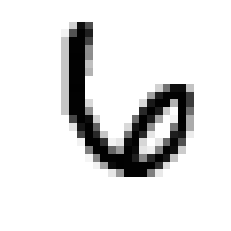

In [49]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("Off")

In [29]:
y[44444]

'6'

In [32]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [33]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 Detector

Binary Classifier


In [50]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 6)
y_test_2 = (y_test == 6)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(tol=0.1)

In [53]:
clf.fit(x_train, y_train_2)

/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [54]:
clf.predict([some_digit])

array([ True])

In [74]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [75]:
accuracy.mean()

0.9843999999999999

In [58]:
from sklearn.model_selection import cross_val_predict
y_train_predictions = cross_val_predict(clf, x_train, y_train_2, cv=3 )

/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [59]:
y_train_predictions

array([False, False, False, ..., False, False,  True])

## Confusion Matrix


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_train_2, y_train_predictions)

array([[53593,   489],
       [  447,  5471]])

In [64]:
# What would happen for perfect predictions?
confusion_matrix(y_train_2, y_train_2)

array([[54082,     0],
       [    0,  5918]])

## Precision, Recall and F1 Score

In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [71]:
precision_score(y_train_2, y_train_predictions) #Precision

0.9179530201342282

In [72]:
recall_score(y_train_2, y_train_predictions) #Recall

0.9244677255829672

In [73]:
f1_score(y_train_2, y_train_predictions) #F1 Score

0.9211988550260988

## Precision recall curve

In [76]:
from sklearn.metrics import precision_recall_curve

In [83]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranjalghimire/opt/anaconda3/envs/DSenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [84]:
y_scores

array([-14.38627498,  -4.55170425,  -9.97507688, ...,  -0.35609469,
       -20.84412197,   8.5728516 ])

In [85]:
precisions, recalls, threshold = precision_recall_curve(y_train_2, y_scores)


In [86]:
precisions

array([0.12422334, 0.12420496, 0.12420757, ..., 1.        , 1.        ,
       1.        ])

In [87]:
recalls

array([1.00000000e+00, 9.99831024e-01, 9.99831024e-01, ...,
       3.37952011e-04, 1.68976005e-04, 0.00000000e+00])

In [88]:
threshold

array([-20.6159371 , -20.61509637, -20.61509216, ...,  14.49867187,
        14.63125581,  14.70075828])

## Plotting Precision Recall Curve

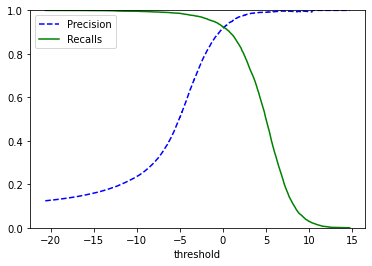

In [90]:
plt.plot(threshold, precisions[:-1], "b--", label="Precision")
plt.plot(threshold, recalls[:-1], "g-", label="Recalls")
plt.xlabel('threshold')
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()